<h2><center>Backprop Algorithm for Neural Network</center></h2>


In [271]:
import numpy as np
from random import shuffle

In [253]:
x = np.array([[1., 1.], [-1., 1.], [1., -1.], [-1., -1.]])
y = np.array([1., 0., 0., 1.]).reshape(-1, 1)
print("shape of \nx : {} \ny : {}".format(x.shape, y.shape))

shape of 
x : (4, 2) 
y : (4, 1)


We are going to work with a simple network that has one hidden layer (2 neurons). Since x has 2 features, we would need a weight matrix of 2X2 to map all the input features to the 2 neurons in the hidden layer as shown in the figure. The superscript shows the hidden layer number and the subscript of weights shows the mapping. The final prediction is classification and hence we need to calculate a single value from the 2 nodes. For this we use the 2 weights as shown in figure<br>
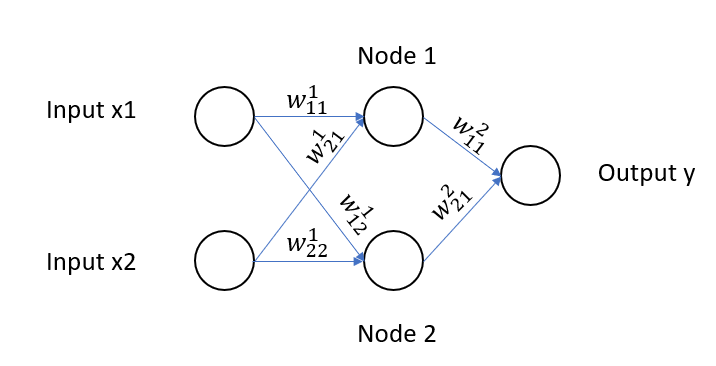

the weight matrix for the first layer would be of the shape 2X2:
\begin{equation*}
W = \begin{vmatrix}
w11 & w21\\
w21 & w22
\end{vmatrix}
\end{equation*}
Weights are arranged in such a way that each row produces output for a particular node i.e., w11 and w21 when multiplied with x1 and x2 correspondingly produces the input value of Node 1. Hence, the equation used for forward propogation is <b>np.dot(W, x)</b> where 
\begin{equation*}
X = \begin{vmatrix}
x1\\
x2
\end{vmatrix}
\end{equation*}


<h4>Initialize werights and bias</h4>
<p>weights are initialized randomly and then learnt using backpropogation algorithm. Weights alone does not provide sufficient aggregate as this would predict 0 whenever x values are 0. Inorder for the function to predict a specific value even when all the inputs are 0 we need to add bias. Bias helps the aggregation to have a y - intercept which otherwise would have passed through the origin.</p> 

In [248]:
np.random.seed(seed = 0)
bias_layer1 = np.random.randn(2, 1)
w1 = np.random.randn(2,2)
bias_layer2 = np.random.randn(1, 1)
w2 = np.random.randn(1,2)
print("For layer 1, Random bias is \n{} \nRandom weights is \n{}".format(bias_layer1, w1))
print("For layer 1, Random bias is \n{} \nRandom weights is \n{}".format(bias_layer2, w2))
prev_w2 = w2
prev_w1 = w1

For layer 1, Random bias is 
[[1.76405235]
 [0.40015721]] 
Random weights is 
[[ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]
For layer 1, Random bias is 
[[0.95008842]] 
Random weights is 
[[-0.15135721 -0.10321885]]


<h4>Forward pass</h4>

In [249]:
def forward_prop(x, bias, W, is_lastlayer):
    a = np.dot(W, x)
    a = a.reshape(W.shape[0], 1)
    a = a + bias
    """we are using a relu activation function"""
    if(is_lastlayer):
        h = a
    else:
        h = np.maximum(np.zeros((W.shape[0], 1)), a)
    return a, h

In [250]:
a1, h1 = forward_prop(x[0], bias_layer1, w1, False)
print("aggregate :", a1)
print("relu activation :", h1)

aggregate : [[4.98368353]
 [1.29043732]]
relu activation : [[4.98368353]
 [1.29043732]]


The output we have from this calculation are values for Node1(h1) and Node2(h2) given in the figure. Now the neural network treats these values as inputs to find the final output using w2 and bias2. Since the output layer is a single node out weight matrix will have just a single row and bias would be a single number.

In [251]:
a2, h2 = forward_prop(h1, bias_layer2, w2, True)
print("aggregate :", a2)
print("linear activation :", h2)
output = h2

aggregate : [[0.06257453]]
relu activation : [[0.06257453]]


So, with the random weights that was selected the algorithm predicts 0 as output.

<h4>Backward pass</h4>

Here, we have to find the error in prediction and then propogate this error to modify all the weights so that the next prediction is a bit closer to the actual target value. Hence we start by claculating the deviation of the prediction to the target.

In [255]:
sq_error = np.power((y[0] - output), 2)
print(sq_error)

[[0.87876651]]


derivative of the squared loss with respect to the output gives us the der_err as 
-2(y - output). The 2 constant can be ignored as this would be compensated by the learning rate. This is the error that gets propogated throughout the network.

In [256]:
der_err = (output - y[0])
print(der_err)

[[-0.93742547]]


Inorder to calculate the component of this error that gets propogated to the weights we define a variable delta (delta_layer) as elementwise product of der_error and derivative of activation with aggregation (der_activation). der_activation in case of relu can be taken as 1 if activation is greater than 0 and 0 otherwise.

In [239]:
der_activation = 1 #no activation on last layer

In [240]:
delta_layer2 = np.multiply(der_err, der_activation)
print(delta_layer2)

[[-0.93742547]]


the derivative of error with respect to weights can be computed as dot product of delta_layer and previous activation output transposed (h1)

In [241]:
grad_weight2 = delta_layer2 * h1.T
print(grad_weight2)

[[-4.67183186 -1.20968881]]


Now, we have gradient computed from the error component. Using this and a learning rate we can calculate the updated w2 values.

In [242]:
learn_rate = 0.01
print("learning rate :", learn_rate)
prev_w2 = w2
print("previous w :", prev_w2)

learning rate : 0.01
previous w : [[-0.15135721 -0.10321885]]


In [243]:
w2 = w2 - learn_rate * grad_weight2
print("Updated weights :", w2)

Updated weights : [[-0.10463889 -0.09112196]]


We use the updated w2 values for further back propogation and updating w1. This update is called dirty update and is widly accepted to be experimentaly better than actual update. Actual update would be the one that uses the old W values until the error with respect to those weights are fully propogated.

<h4>Combining the back prop into a function</h4>

In [244]:
def back_prop(prev_delta, is_last_layer, forward_weights, learn_rate, weights, forward_activation, backward_activation):
    """derivative of activation """
    der_activation = forward_activation.copy()
    der_activation[der_activation >= 0] = 1
    der_activation[der_activation < 0] = 0
    print("der_activation :", der_activation)
    """error propogated through activation in front of the weights"""
    activation_prop = delta_layer2 * der_activation
    if(is_last_layer):
        delta = prev_delta
        grad_weight = delta * backward_activation.T
    else:
        delta = forward_weights.T * activation_prop
        print(delta)
        grad_weight = np.dot(delta, backward_activation.T)
    print("grad :", grad_weight)
    print("prev weight : ", weights)
    weights = weights - learn_rate * grad_weight
    return delta, weights

In [245]:
delta_layer2, w2_new = back_prop(der_err, True, None, 0.01, prev_w2, h2, h1)
print("Delta in this layer :\n", delta_layer2)
print("Updated weights :\n", w2_new)

der_activation : [[1.]]
grad : [[-4.67183186 -1.20968881]]
prev weight :  [[-0.15135721 -0.10321885]]
Delta in this layer :
 [[-0.93742547]]
Updated weights :
 [[-0.10463889 -0.09112196]]


In [246]:
delta_layer1, w1_new = back_prop(delta_layer2, False, w2_new, 0.01, prev_w1, h1, x[0].reshape(-1, 1))
print("Delta in this layer :\n", delta_layer1)
print("Updated weights :\n", w1_new)

der_activation : [[1.]
 [1.]]
[[0.09809116]
 [0.08542005]]
grad : [[0.09809116 0.09809116]
 [0.08542005 0.08542005]]
prev weight :  [[ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]
Delta in this layer :
 [[0.09809116]
 [0.08542005]]
Updated weights :
 [[ 0.97775707  2.23991229]
 [ 1.86670379 -0.97813208]]


<h4>Error Computaion</h4>

In [259]:
def error(output, target):
    sq_loss = np.sum(np.power((target - output), 2))
    return sq_loss

<h2>Complete program</h2>


In [297]:
def forward_prop(x, bias, W, is_lastlayer):
    a = np.dot(W, x)
    a = a.reshape(W.shape[0], 1)
    a = a + bias
    if(is_lastlayer):
        h = a
    else:
        """using a relu activation function"""
        h = np.maximum(np.zeros((W.shape[0], 1)), a)
    return a, h

def error(output, target):
    marginalize = len(target)
    sq_loss = np.sum(np.power((target - output), 2))
    rmse_loss = np.sqrt(sq_loss/marginalize)
    return rmse_loss

def back_prop(prev_delta, is_last_layer, forward_weights, learn_rate, 
              weights, forward_activation, backward_activation):
    """derivative of activation """
    der_activation = forward_activation.copy()
    der_activation[der_activation >= 0] = 1
    der_activation[der_activation < 0] = 0
    """error propogated through activation in front of the weights"""
    activation_prop = delta_layer2 * der_activation
    if(is_last_layer):
        delta = prev_delta
        grad_weight = delta * backward_activation.T
    else:
        delta = forward_weights.T * activation_prop
        grad_weight = np.dot(delta, backward_activation.T)
    weights = weights - learn_rate * grad_weight
    return delta, weights

In [298]:
"""intializing parameters"""
verbose = 0
epochs = 500
learn_rate = 0.01

"""initializing x and y"""
x = np.array([[1., 1.], [-1., 1.], [1., -1.], [-1., -1.]])
y = np.array([1., 0., 0., 1.]).reshape(-1, 1)
if(verbose ==1):
    print("Target values :", y.tolist())

"""initializing weights and bias"""

np.random.seed(seed = 0)
bias_layer1 = np.random.randn(2, 1)
w1 = np.random.randn(2,2)
bias_layer2 = np.random.randn(1, 1)
w2 = np.random.randn(1,2)
n = len(x)
loss_list = []
x_order = np.arange(n)

"""iterating through number of epochs"""
for epoch in range(epochs):
    
    """iterating through each row stochastic"""
    prediction_list = []
#     shuffle(x_order)
    for i in x_order:

        """forward pass"""
        a1, h1 = forward_prop(x[i], bias_layer1, w1, False)
        a2, h2 = forward_prop(h1, bias_layer2, w2, True)
        output = h2
        prediction_list.append(output)

        """error component"""
        der_err = (output - y[i])

        """backward propogation"""
        delta_layer2, w2 = back_prop(der_err, True, None, learn_rate, w2, h2, h1)
        delta_layer1, w1 = back_prop(delta_layer2, False, w2, learn_rate, w1, h1, x[i].reshape(-1, 1))

    """check prediction after an epoch"""
    prediction = np.array(prediction_list).reshape(-1, 1)
    loss = error(y, prediction)
    if(verbose == 1):
        print("After epoch : ", epoch)
        print("\tPrediction : ", prediction_list)
        print("\tLoss is : {}\n\n".format(epoch, loss))
    loss_list.append(loss)

In [299]:
from matplotlib import pyplot as plt 

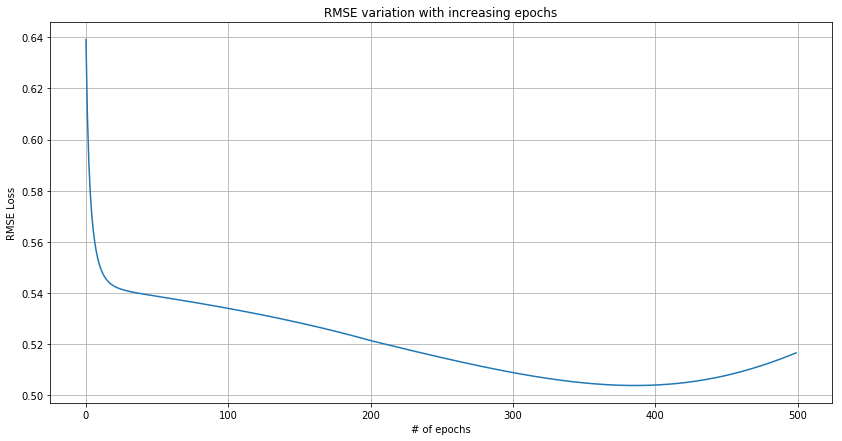

In [300]:
plt.figure(figsize=(14,7))
plt.plot(range(epochs), loss_list, label = "Training loss")
plt.xlabel('# of epochs')
plt.ylabel('RMSE Loss')
plt.title("RMSE variation with increasing epochs")
plt.grid()
plt.show()